# Project: Finding Heavy Trucks Indicators on I-94

I-94 is is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.
The project aims to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

The dataset used in this project is based on data collected from Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94 (from east to west). Includes weather and holiday features from 2012-2018.


In [1]:
#Importing pandas library and exploring the first and the last 5 rows of the dataset

import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


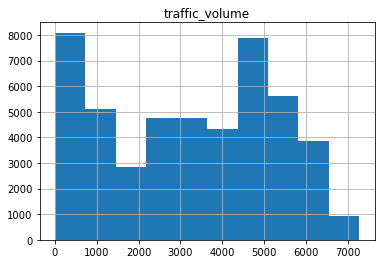

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94.hist('traffic_volume')
plt.show()

i_94['traffic_volume'].describe()

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

The reason behind this variation in the traffic volumes might be caused by the date timing, so deviding the data into two parts (daytime, nighttime) might gives the data an intersting direction. This direction is a comparison between daytime and nighttime data.

## Day Time VS Night Time

In [5]:
# Transferring the date_time column to datetime:

i_94['date_time'] = pd.to_datetime(i_94['date_time'])

daytime_data = i_94[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
nighttime_data = i_94[(i_94['date_time'].dt.hour >=19) | (i_94['date_time'].dt.hour < 7)]


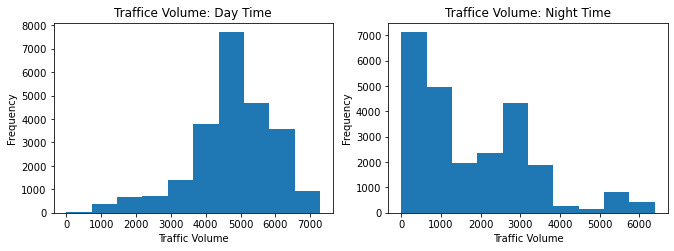

In [6]:
# Visualizing the data

plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Traffice Volume: Day Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Traffice Volume: Night Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [7]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

* According to the grid above, the traffic volume tends to increase in the day time gradually, until it reaches the peak, then it starts to decrease again. Meanwhile, traffic volume tends to decrease during the night hours.

* Day time freaquency is almost 4 times the night time.

The goel is to find the indicators of heavy traffic, so it is better to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.
The following parameters will help to look at a few line plots showing how the traffic volume changed:

* Month
* Day of the week
* Time of day

## Traffic Volume by Month

In [9]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-9-51b386012796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['month'] = daytime_data['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

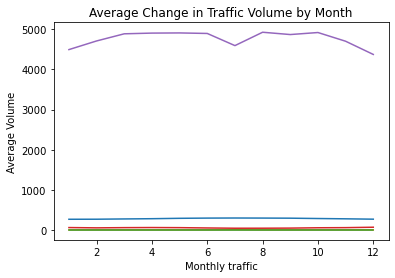

In [10]:
plt.plot(by_month)
plt.title('Average Change in Traffic Volume by Month')
plt.xlabel('Monthly traffic')
plt.ylabel('Average Volume')
plt.show()


Traffic volume increases gradually from January till March. starting from March, the volume stablizes till June then starts to drop gradually till July, and starts to increase again in August. the volume almost stablizes in the period from August to October, then it decreases gradually moving forward to December.

In general, traffic is heavier during warm months (March - October), and lighter during cold months (November - February).

## Traffic Volume by Day

In [11]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_day = daytime_data.groupby('dayofweek').mean()
by_day['traffic_volume']


<ipython-input-11-f43c8ba73565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

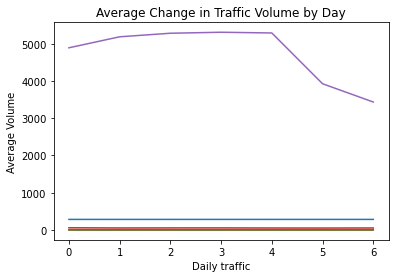

In [12]:
plt.plot(by_day)
plt.title('Average Change in Traffic Volume by Day')
plt.xlabel('Daily traffic')
plt.ylabel('Average Volume')
plt.show()

The line is almost flat during week days, then it decreases gradually starting from Friday till it reaches the lowest point on Sunday. In other words, traffic volume is significantly heavier on business days compared to the weekends.

Weekends will drag down the average values, which will affect the results. So, the best thing to do is to look at the averages separately, by splitting the data based on the day type: business day or weekend.

## Traffic Volume by Hour

In [13]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-13-75715b0adf0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_data['hour'] = daytime_data['date_time'].dt.hour


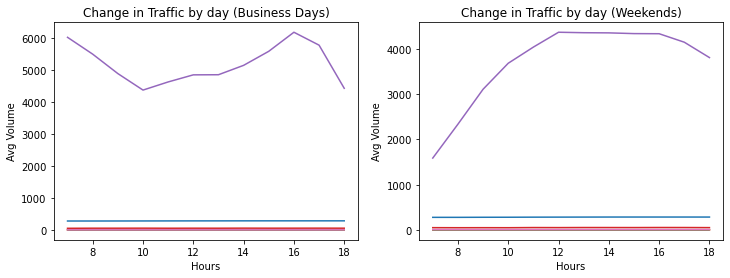

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title('Change in Traffic by day (Business Days)')
plt.xlabel('Hours')
plt.ylabel('Avg Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title('Change in Traffic by day (Weekends)')
plt.xlabel('Hours')
plt.ylabel('Avg Volume')

plt.show()

looking at business days graph, traffic volume starts from the highst point at 7 am (where most of the employees go to their work) and tends to decrease all the day. Then it starts to increase agin till it reaches the peak at 4 pm, and it decreases again till it reaches its lowest at 6 pm (most probably after employees and students get back to their homes).

While in weekends, traffic volume is low at general. Unlike business days, trafiic volume tends to be at its lowest at 7 am, and reaches it peak at 12 pm.

## Weather Columns

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so it is better to start by looking up their correlation values with traffic_volume.

In [15]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather columns with the strongest corrolation with traffic volume are temp and clouds_all; however, they don't seem to be reliable indicators for heavy traffic.

So, the next step will be looking at categorical weather_related columns (weather_main, weather_description).
This requires calculating the average traffic volume associated with each unique value in these two columns.

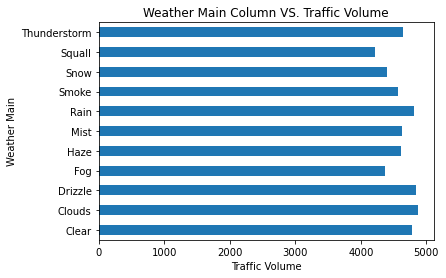

In [16]:
#calculating the average traffic volume:

by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

#creating a bar plot for the traffic_volume column of by_weather_main

by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main Column VS. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.show()

Traffic volume doesn't exceed 5,000 at any of the above circumstance, even when the weather is clear. Notably, traffic volume slightly decreases when the weather is squall, snowing or foggy.

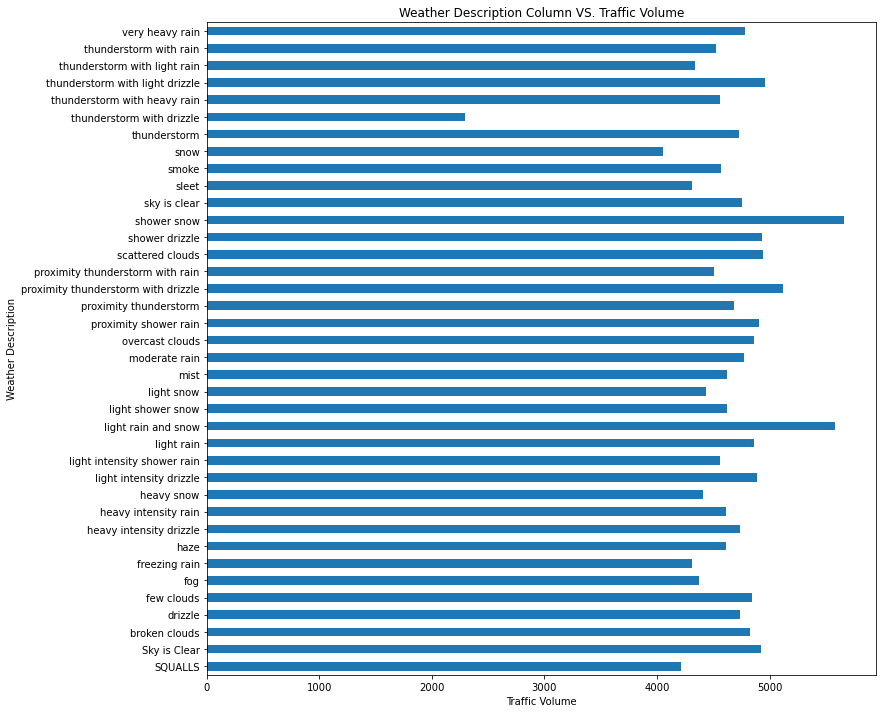

In [17]:
#creating a bar plot for the traffic_volume column of by_weather_description

plt.figure(figsize=(12,12))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Weather Description Column VS. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

Traffic volume exceedes 5,000 when there is:

* Shower snow 
* Light rain 
* Proximity thunderstorm with drizzle 

Although these weather types considered bad, traffic volume increases during them, this might be because they are not seriously harmful, or because people prefer to use their vihecles during these circumstances.

However, Traffic volume remarkably decreases when there is a thunderstorm with drizzle, which is sensable because people would prefer to stay home while it is raining.

## Conclusion:

* Traffic Volume is heavier during warm months (March - October), and lighter during cold months (November - February).
* Traffic volume is significantly heavier on business days compared to weekends.
* Traffic volume tends to increase in working days at the time employees go to/back from their work, while in weekends it is generally low, but it increases during the day.
* Generally, traffic volume is less than 5,000 in different weather types, except for (shower snow, light rain and proximity thunderstorm with drizzle), it exceeds 5,000.
